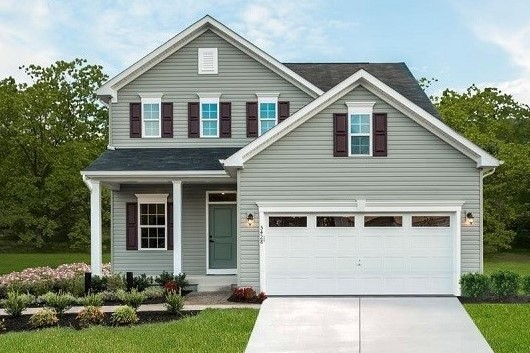

# Machine Learning model to predict house price using linear regression

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
data=pd.read_csv("USA_Housing.csv")

## Basic Checks

In [3]:
# First five rows
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# Last five rows
data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [5]:
# Shape of data
data.shape

(5000, 7)

* Dataset contains 7 columns with 5000 features.

In [6]:
# columns in data
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
# Statistics of data
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
# Statistics of data for categorical data
data.describe(include="O")

,Address
count,5000
unique,5000
top,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
freq,1


In [10]:
# Check missing values
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

## Exploratory Data Analysis

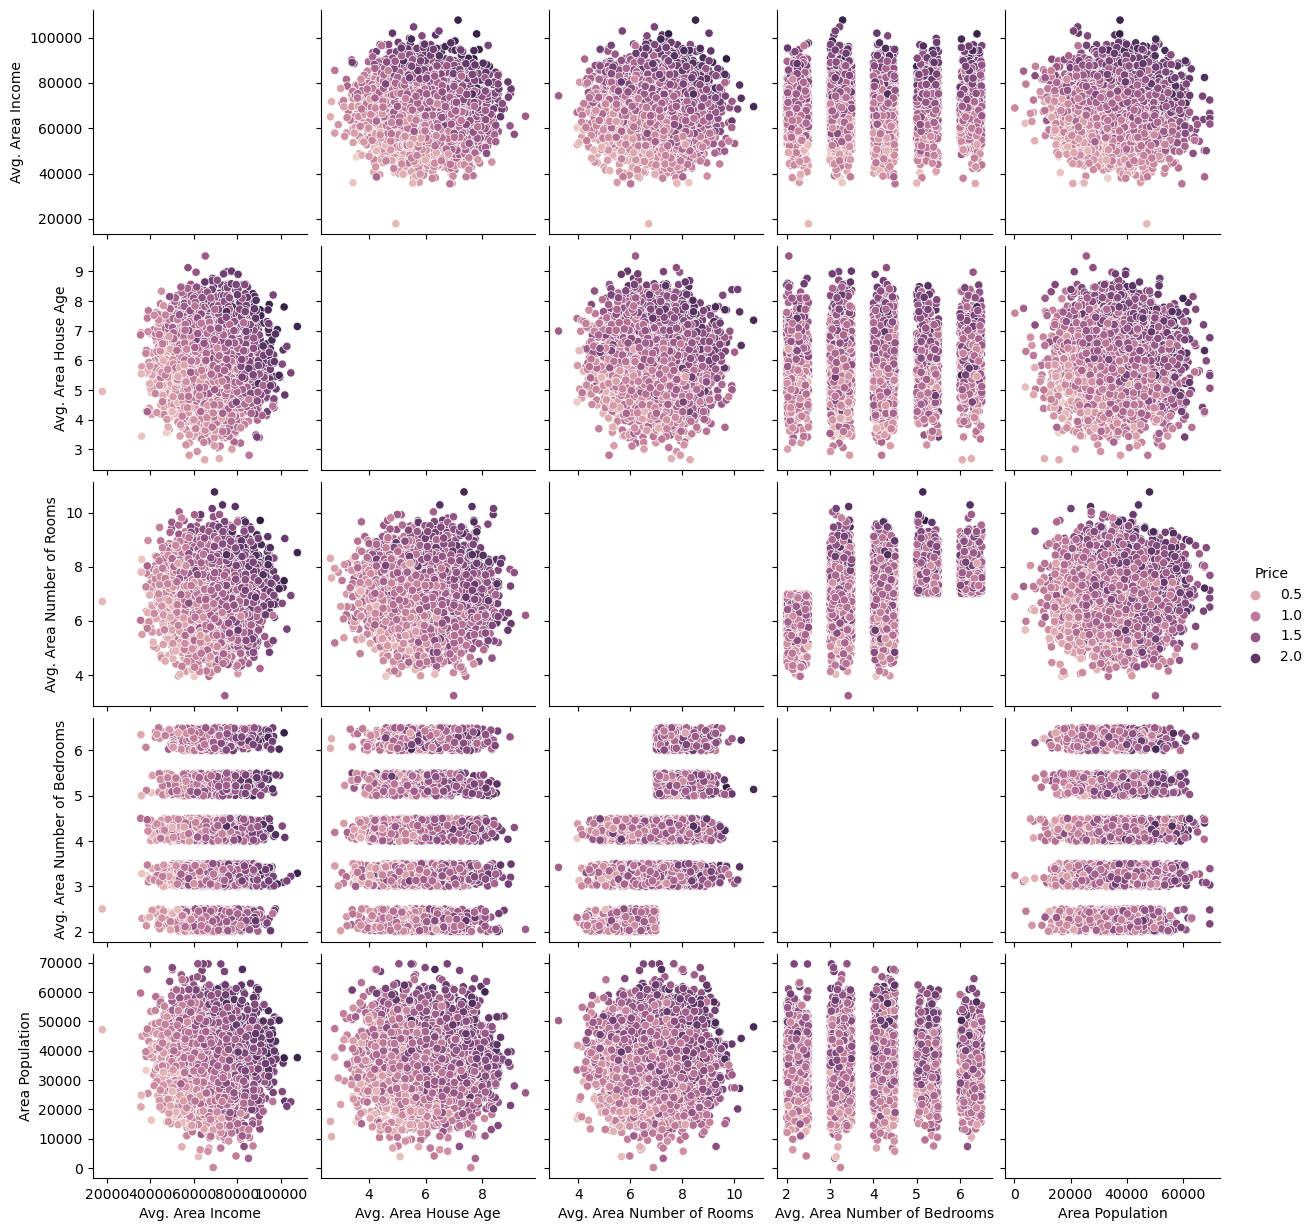

In [11]:
sns.pairplot(data,hue='Price')
plt.show()

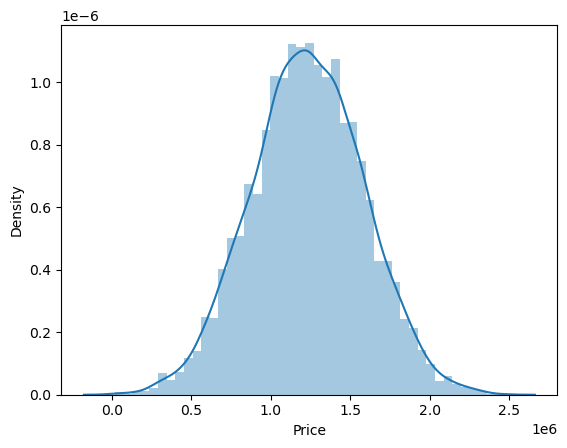

In [12]:
sns.distplot(data['Price'])
plt.show()

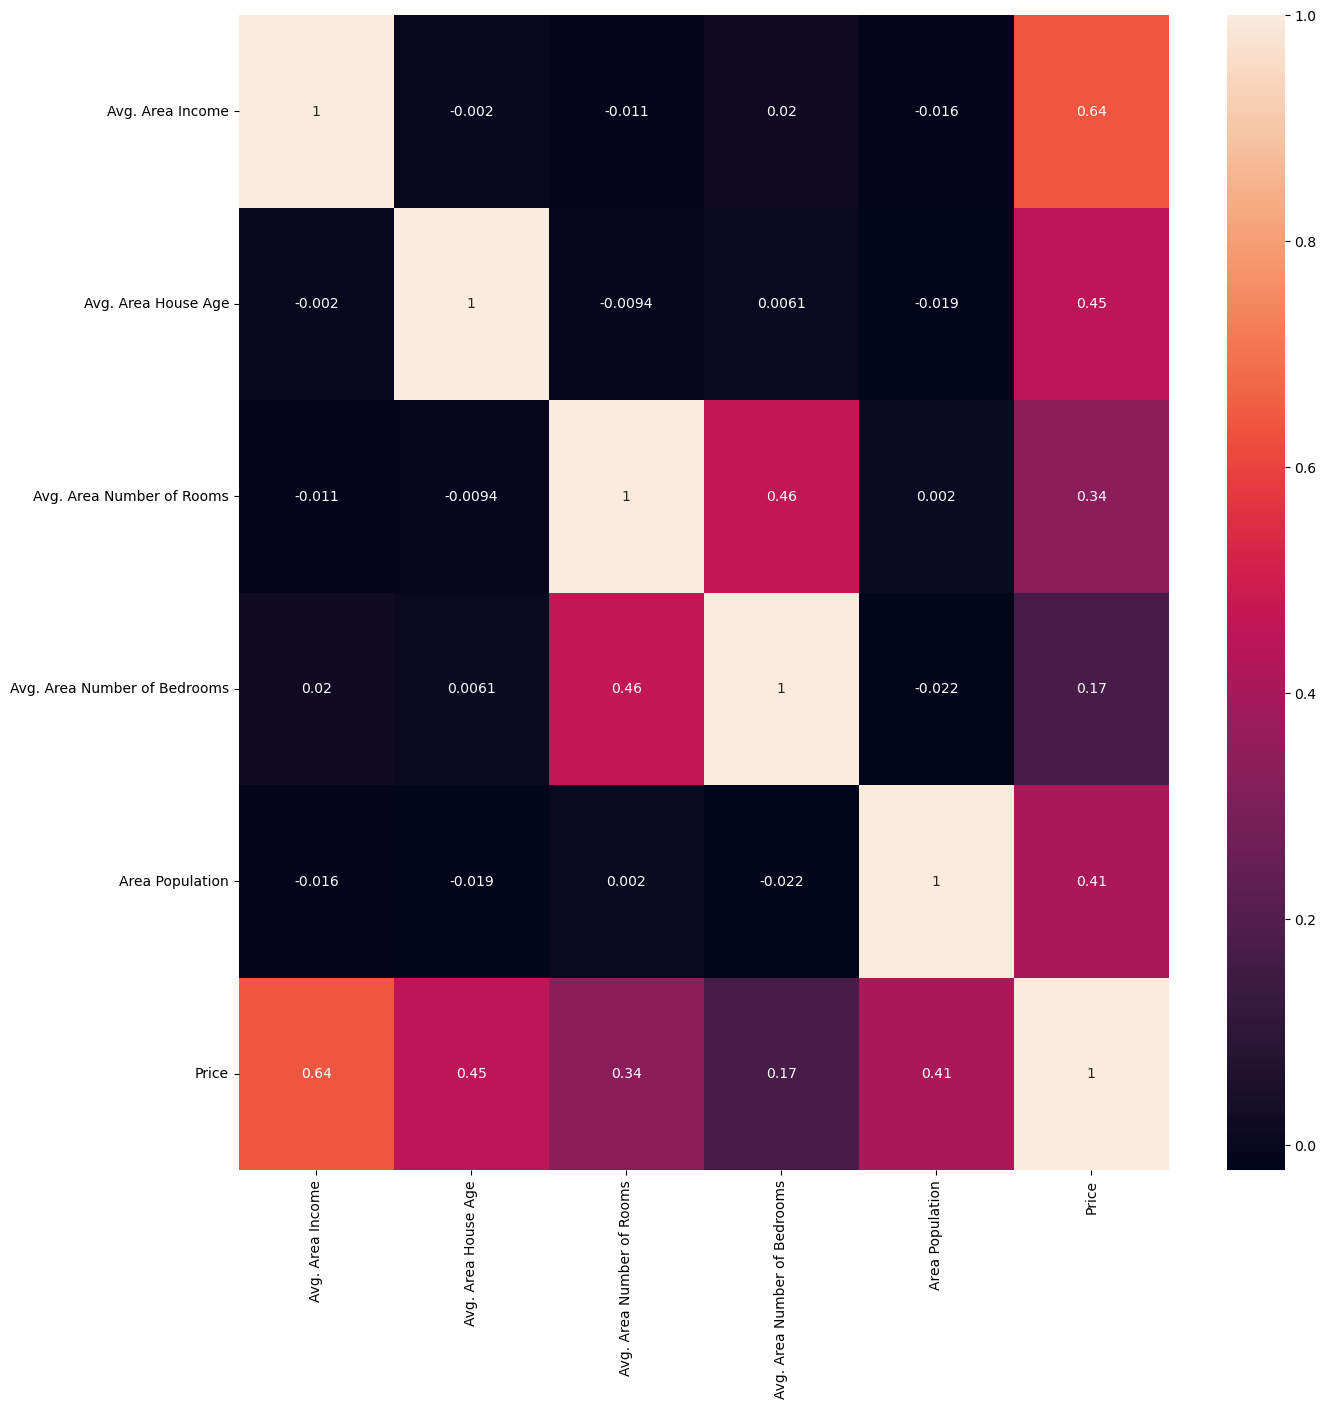

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Model Building

In [14]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [15]:
# Creating depend & independent features
x=data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y=data.Price

In [16]:
# Splitting data into train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Linear Regression 

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
print('r2_score:',r2_score(y_test,prediction))
print('MAE:',mean_absolute_error(y_test, prediction))
print('MSE:',mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

r2_score: 0.9179971706834602
MAE: 80879.0972348696
MSE: 10089009300.89066
RMSE: 100444.06055556824


### Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)

In [20]:
print('r2_score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score: 0.747687614787995
MAE: 140261.7209430736
MSE: 31042611850.71559
RMSE: 176189.13658541944


### KNeighbors Regressor

In [21]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(x_train, y_train)
y_predi=knn.predict(x_test)

In [22]:
print('r2_score:',r2_score(y_test,y_predi))
print('MAE:',mean_absolute_error(y_test, y_predi))
print('MSE:',mean_squared_error(y_test, y_predi))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predi)))

r2_score: 0.48538640412155953
MAE: 203987.4662913469
MSE: 63314173406.63843
RMSE: 251623.07804857334


### Support Vector Regressor

In [23]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train, y_train)
y_predict=svr.predict(x_test)

In [24]:
print('r2_score:',r2_score(y_test,y_predict))
print('MAE:',mean_absolute_error(y_test, y_predict))
print('MSE:',mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predict)))

r2_score: -0.001520315935481742
MAE: 279212.7242489848
MSE: 123219501896.69862
RMSE: 351026.3549887652


### Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(x_train, y_train)
y_predict_rf=rf.predict(x_test)

In [26]:
print('r2_score:',r2_score(y_test,y_predict_rf))
print('MAE:',mean_absolute_error(y_test, y_predict_rf))
print('MSE:',mean_squared_error(y_test, y_predict_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predict_rf)))

r2_score: 0.8815357117054664
MAE: 94526.29801747577
MSE: 14574952064.31707
RMSE: 120726.76614701924
